In [2]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train =pd.read_csv(r"C:\Users\ali umar hasan\Downloads\JOBATHON Analytics vidhya\train_F3fUq2S (1).csv") 

In [4]:
test = pd.read_csv(r"C:\Users\ali umar hasan\Downloads\JOBATHON Analytics vidhya\test_Bk2wfZ3.csv")

# Step1. Data Inspection and Data Cleaning

In [5]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [162]:
#insight: train set is free of null values..
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [6]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [163]:
train.drop('is_timer', axis = 1, inplace = True) #is_timer have all the zero values and it doesnt make sense for further process

In [7]:
train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


We can draw inferences such as
1) There are 15 senders for a maximum of 1888 campaign id.. applications of email bots can make a difference because 15 are
   senders less for the whole compaign

2) There are comaparitively lesss mails sent on the weekends which have a possibility in decreasing the CTR rate..
   as it is understood empoloyees or senders arent on their working days.. we can use AI bots as a substitute to keep
   the connection with the customers or the users.. it will for sure increase CTR
  

3) The subject len of the email is with an average of 86 with max of 265 and holds a standard deviation of 30..
   if we hold on to an observation of an ideal subject length for an email it is basically between 40-65 characters..
   this should be customized as it effects the CTR.
   
4) The body_len of an email is exclusively used with an average of 14186 and max of 44491.. ie range(23-44491) characters..
   this needs to be optimized because.. as per the ideal email model it contains a character range (1000-1800)

In [8]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [10]:

train[['campaign_id','sender']].sort_values(by ='sender', ascending = False)

,campaign_id,sender
1837,1838,15
1718,1719,15
1741,1742,15
1739,1740,15
1816,1817,15
...,...,...
508,509,2
1161,1162,1
321,322,0
308,309,0


# Step 2: Exploratory Data Analysis

C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sender', ylabel='count'>

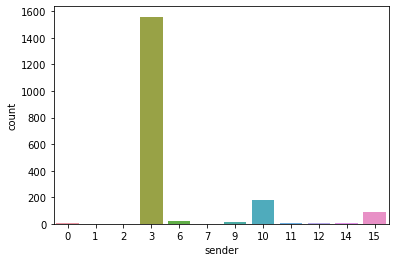

In [11]:
#insight: among all senders..most click rates are accomplished by sender '3'
sns.countplot('sender', data = train)


<AxesSubplot:xlabel='is_weekend', ylabel='count'>

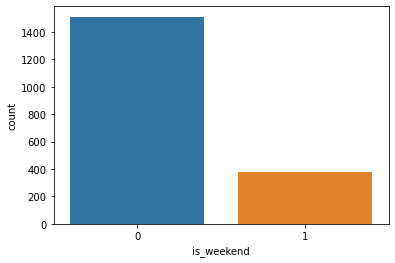

In [13]:
#insight: we have less click rates on weekends 
sns.countplot('is_weekend', data = train)

In [14]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [19]:
train['subject_len'].unique()

array([ 76,  54,  59,  74,  80,  60,  89,  77,  78,  82,  86,  91,  83,
        71,  57,  70,  69,  93,  42,  85, 104, 124,  81,  88,  73,  65,
        87,  97,  90, 103,  79,  67,  92,  98,  25, 100,  94, 116,  63,
       110,  40,  68,  64,  84,  62,  75, 118,  96,  72,  61, 102,  53,
       121,  95, 106, 113,  99, 125, 115,  52, 107, 111, 109,  58,  66,
       112,  44, 161,  55, 167,  47, 101, 179, 177, 120,  50,  45, 159,
       168,  56, 211, 105, 202, 122, 126, 123, 114, 108, 131, 127, 117,
       134, 133, 145,  48,  49, 157, 129, 130, 149,  37, 135,  51, 136,
       220, 165, 186, 225, 205,  31, 119, 128, 132, 265, 160, 166, 156,
       197,  43, 204,  36,  46, 138, 194, 222,  41, 198, 181, 187,  28,
       189, 163, 188, 208, 212, 192, 233,  35, 182, 185, 151, 162,  27,
        26,  39,  29,  23,  14, 207,  17,   9,  15, 214, 199, 218, 173,
       174, 158, 146, 164, 169, 170,  30, 261, 216, 254, 209,  38, 171,
       172], dtype=int64)

In [20]:
train['body_len']

0       10439
1        2570
2       12801
3       11037
4       10011
        ...  
1883     1451
1884    10537
1885    11050
1886    10537
1887    11050
Name: body_len, Length: 1888, dtype: int64

In [21]:
train.head(3)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769


In [164]:
train.corr()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,1.000000,0.443314,-0.052252,0.200128,0.028225,0.036410,0.051932,0.289416,0.209435,0.117558,0.092375,-0.022799,0.219755,-0.006662,-0.128840,-0.002232,-0.041955,-0.058105,-0.104905,0.053315
sender,0.443314,1.000000,-0.102559,0.197929,0.056891,-0.046928,-0.059499,0.188444,0.070689,0.100454,0.016604,-0.093244,0.147959,0.020928,-0.105279,-0.046900,0.024099,-0.071096,-0.132554,-0.031398
subject_len,-0.052252,-0.102559,1.000000,0.427326,-0.224770,-0.033574,-0.056666,0.012601,-0.007108,0.400213,0.144261,-0.002214,-0.293446,0.120273,0.080303,0.125134,0.033410,0.100584,-0.021855,-0.180143
body_len,0.200128,0.197929,0.427326,1.000000,-0.496146,-0.089146,-0.079255,0.026781,-0.027747,0.559353,0.083468,-0.021254,-0.220696,0.184035,-0.043931,0.051123,0.022431,0.023734,-0.075754,-0.247866
mean_paragraph_len,0.028225,0.056891,-0.224770,-0.496146,1.000000,0.003221,-0.012964,0.037475,-0.054066,-0.170012,0.064632,-0.091250,0.162480,-0.096086,-0.043173,-0.032096,0.006765,-0.037435,-0.110896,0.178042
day_of_week,0.036410,-0.046928,-0.033574,-0.089146,0.003221,1.000000,0.720599,-0.058760,0.000249,-0.037789,-0.003614,0.019365,-0.069705,-0.032476,-0.013571,-0.037122,-0.013822,0.012735,0.081693,0.086372
is_weekend,0.051932,-0.059499,-0.056666,-0.079255,-0.012964,0.720599,1.000000,-0.063763,-0.015759,-0.033464,-0.032421,0.036626,-0.065130,-0.033968,-0.007504,-0.033757,-0.036255,-0.009789,0.046638,0.114138
category,0.289416,0.188444,0.012601,0.026781,0.037475,-0.058760,-0.063763,1.000000,0.007144,-0.023931,0.127554,-0.028794,0.132441,-0.101411,0.100071,0.166200,0.068450,0.189839,-0.026602,-0.167756
product,0.209435,0.070689,-0.007108,-0.027747,-0.054066,0.000249,-0.015759,0.007144,1.000000,0.027486,0.043223,0.027952,0.047566,-0.104653,0.013122,-0.018291,-0.060512,-0.110753,0.058073,0.121602
no_of_CTA,0.117558,0.100454,0.400213,0.559353,-0.170012,-0.037789,-0.033464,-0.023931,0.027486,1.000000,0.170387,-0.005971,-0.145453,0.092320,-0.037244,0.041797,-0.015229,-0.015649,-0.007979,-0.172637


<AxesSubplot:>

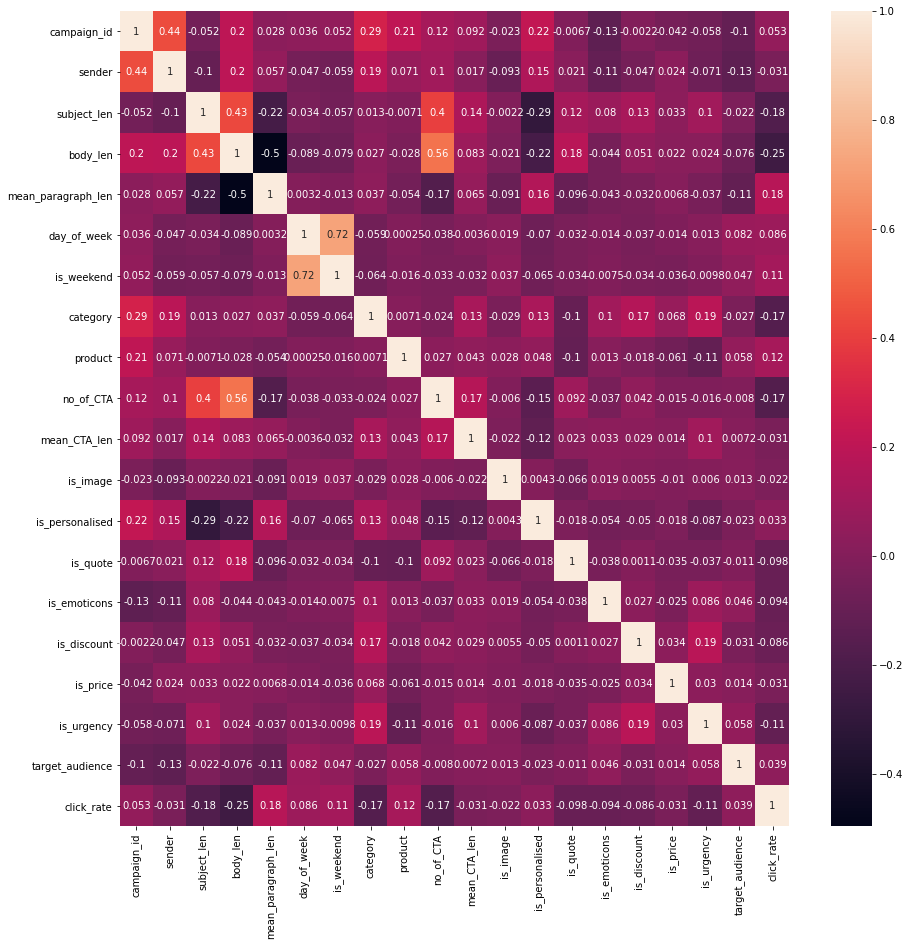

In [165]:
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot = True )

In [38]:
train_corr=train[['mean_paragraph_len','product','is_weekend','click_rate']].copy()

In [48]:
train_corr[['mean_paragraph_len','product','is_weekend','click_rate']].sort_values(by = 'click_rate', ascending = False).head(3)

,mean_paragraph_len,product,is_weekend,click_rate
791,133,27,0,0.897959
1,256,11,1,0.700000
263,50,11,0,0.692521


In [60]:
train_corr[['mean_paragraph_len','product','is_weekend','click_rate']].sort_values(by = 'click_rate', ascending = False).head(3)

In [62]:
kk['click_rate']

791    0.897959
1      0.700000
263    0.692521
Name: click_rate, dtype: float64

In [70]:
train[['sender','click_rate']].sort_values( by = 'click_rate', ascending =False).head(5)

,sender,click_rate
791,7,0.897959
1,3,0.700000
263,3,0.692521
651,3,0.692308
1002,3,0.666667


In [81]:
#insight: sender 3 have acheived highest click_rates
train[['sender','click_rate']].groupby(['sender'])['click_rate'].sum().sort_values(ascending =False).head(3)

sender
3     66.506729
10     7.864495
15     2.422557
Name: click_rate, dtype: float64

In [93]:
ii = pd.DataFrame(train[['sender','click_rate']].groupby(['sender'])['click_rate'].sum().sort_values(ascending =False).head(3))

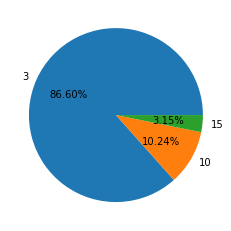

In [121]:
# Insight: sender '3' has acheived highest amount of click rates among all the senders 
plt.pie(ii['click_rate'], labels = ii.index, autopct = '%1.2f%%') 
plt.show()

In [97]:
ii.index

Int64Index([3, 10, 15], dtype='int64', name='sender')

In [102]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [103]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [105]:
train['is_image'].unique()

array([0, 1, 2, 6, 3, 4], dtype=int64)

<AxesSubplot:xlabel='is_image'>

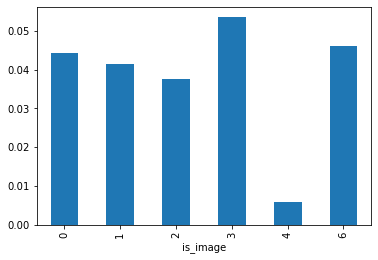

In [109]:
train[['is_image','click_rate']].groupby('is_image')['click_rate'].mean().plot.bar()
#emails with 3 images on average have higher click rate..

In [118]:
train[['mean_CTA_len','click_rate']].groupby('mean_CTA_len')['click_rate'].mean() 

mean_CTA_len
0      0.020199
1      0.007407
4      0.145617
7      0.040923
10     0.030905
         ...   
92     0.008751
113    0.005369
138    0.004797
160    0.076923
162    0.060390
Name: click_rate, Length: 79, dtype: float64

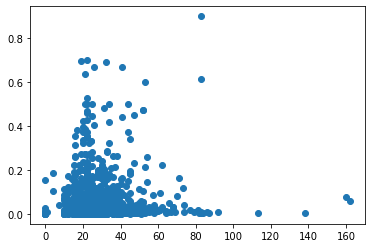

In [116]:
#insight:mean CTA length in range (0-60) have achieved higher click_rates
plt.scatter(x = train['mean_CTA_len'], y = train['click_rate'])  

C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_CTA_len', ylabel='Density'>

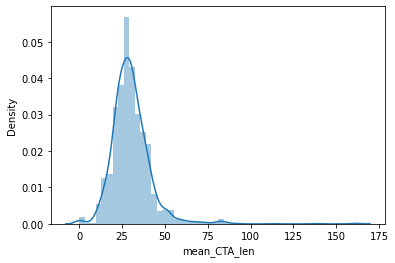

In [120]:
sns.distplot(train['mean_CTA_len'])

In [122]:
train.head(3)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769


In [148]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [150]:
train['product'].unique()

array([26, 11,  9, 10,  5, 13, 12,  6,  1, 31, 27, 42, 34, 23, 19, 16, 22,
       28,  3,  7, 18, 20, 43,  0, 21, 39,  4,  2,  8, 41, 24, 36, 25, 35,
       40, 38, 14, 33, 37, 32, 17, 15, 29], dtype=int64)

In [153]:
train1 = train[['subject_len', 'body_len','mean_paragraph_len', 'day_of_week','no_of_CTA', 'mean_CTA_len', 'target_audience','click_rate']]

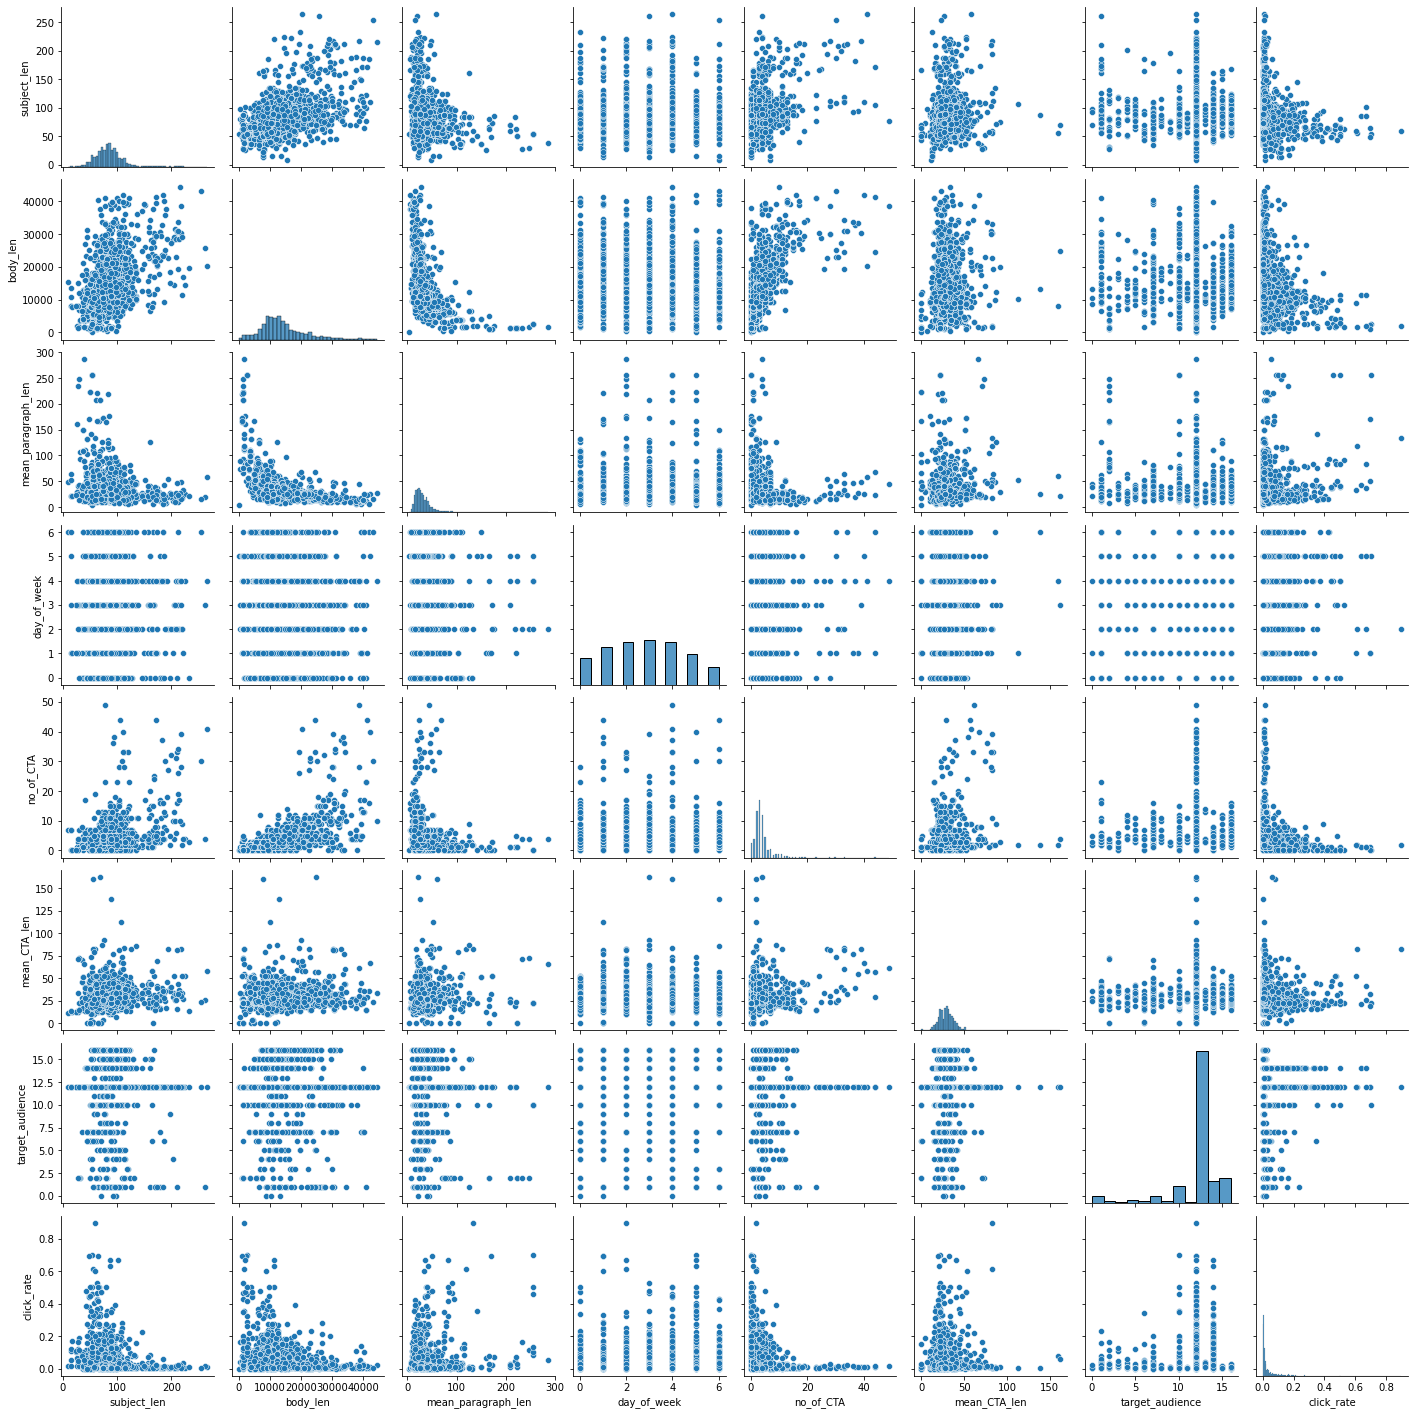

In [155]:
#insight: plots for the non bolean or numeric features
sns.pairplot(train1) 

In [167]:
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience', 'click_rate'],
      dtype='object')

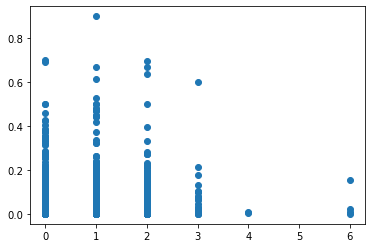

In [170]:
#insight: emails with 1 image have highest Click_rate
plt.scatter(x = train['is_image'], y = train['click_rate']) 

In [171]:
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [172]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


<AxesSubplot:xlabel='times_of_day'>

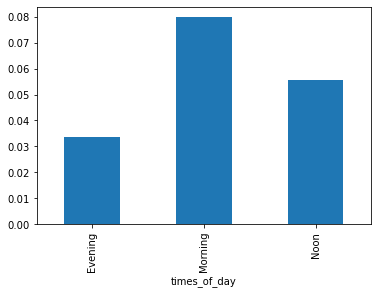

In [176]:
#insight: we have most of click_rates during the morning..
train[['times_of_day','click_rate']].groupby('times_of_day')['click_rate'].mean().plot.bar()

In [179]:
#encoding the categorical features to numeric.
train['times_of_day'] = train['times_of_day'].map({'Evening': 0 ,'Morning': 1 , 'Noon':2})

# Step 3:Building and Training the Machine learning model.
   Models used are
  1) KNeighborsRegressor ( used to know the nature of data )
  
  2) Random Forest Regressor (r2_score = 0.61)
  
  3) Gradient boosting ensemble techique for Regression (r2_score = 0.44)
  
  4) Linear Regression (Best Model with Max accuracy obtained-r2_score = 1)

In [380]:
from sklearn.neighbors import KNeighborsRegressor
KNNR = KNeighborsRegressor()

In [381]:
X_train = train.iloc[:,:-1]

In [382]:
X_test = test.iloc[:,:]
y_train = train.iloc[:,-1]


In [383]:
test.tail()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
757,2646,3,72,9081,46,0,0,0,15,9,4,28,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,0,2,11,5,27,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,0,15,9,2,23,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,2,2,11,0,22,0,0,1,0,0,0,0,10
761,2650,3,58,10537,40,0,0,0,2,11,5,27,0,0,0,0,0,0,0,1


In [384]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   campaign_id         762 non-null    int64
 1   sender              762 non-null    int64
 2   subject_len         762 non-null    int64
 3   body_len            762 non-null    int64
 4   mean_paragraph_len  762 non-null    int64
 5   day_of_week         762 non-null    int64
 6   is_weekend          762 non-null    int64
 7   times_of_day        762 non-null    int64
 8   category            762 non-null    int64
 9   product             762 non-null    int64
 10  no_of_CTA           762 non-null    int64
 11  mean_CTA_len        762 non-null    int64
 12  is_image            762 non-null    int64
 13  is_personalised     762 non-null    int64
 14  is_quote            762 non-null    int64
 15  is_emoticons        762 non-null    int64
 16  is_discount         762 non-null    int64
 1

In [385]:
import os
from chart_studio.plotly  import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
from sklearn.metrics import r2_score

In [386]:
y_train.shape ,y_test.shape

((1888,), (762,))

In [387]:
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    model = clf.fit(X_train,y_train)
    y_test = model.predict(X_test)
    score.append(clf.score(X_test,y_test))   

In [388]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')


In [389]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 1, Max Accuracy = 100.0


In [390]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
model = clf.fit(X_train, y_train)
y_test = model.predict(X_test)
print(clf.score(X_test, y_test ))   
y_test= model.predict(X_test)

1.0


In [391]:
trace0 = go.Scatter(
    y = y_test,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Actual click_rate',
    marker = dict(
    color = 'rgb(10, 150, 50)')
)

trace1 = go.Scatter(
    y = y_pred,
    x = np.arange(200), 
    mode = 'lines', 
    name = 'Predicted click_rate',
    line = dict(
        color = 'rgb(110, 50, 140)',
        dash = 'dot'
    )
)
layout = go.Layout(
    xaxis = dict(title = 'Index'), 
    yaxis = dict(title = 'Normalized click_rates')
)

figure = go.Figure(data = [trace0, trace1], layout = layout)
iplot(figure)

In [343]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,2,6,26,3,37,1,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,0,2,11,0,22,1,0,1,0,0,0,0,10
3,1892,3,88,1473,78,3,0,0,2,11,0,22,1,0,1,0,0,0,0,10
4,1893,3,78,9020,29,3,0,2,6,26,2,40,0,0,0,0,0,0,0,14


In [191]:
test.drop('is_timer', axis = 1, inplace = True)

In [193]:
test.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience'],
      dtype='object')

In [202]:
for columns in test.columns:
    print('{} has unique {}'.format(columns,test[columns].unique()))

campaign_id has unique [1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902
 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916
 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028
 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042
 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056
 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070
 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 208

In [203]:
test['times_of_day'] = test['times_of_day'].map({'Evening':0, 'Morning': 1 , 'Noon': 2})

# Random Forest regressor

In [344]:
from sklearn.ensemble import RandomForestRegressor

In [345]:
RFR = RandomForestRegressor()


In [346]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:]

In [347]:
from sklearn.model_selection import RandomizedSearchCV

In [348]:
rf = RandomForestRegressor()

In [349]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #number of trees in random forests..

In [350]:
max_features = ['auto','sqrt']

In [351]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

In [352]:
min_samples_split = [2,5,10,15,100]

In [353]:
min_samples_leaf = [1,2,5,10]

In [354]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [355]:
rf_random =RandomizedSearchCV(estimator = rf , param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5 , verbose = 2 ,random_state = 42, n_jobs = 1) 

In [356]:
model = rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [357]:
#We can obtain y_test ie. click rates for testing dataset
y_test = model.predict(X_test)

In [358]:
y_test

array([0.07484695, 0.27321659, 0.18074726, 0.17956735, 0.10875159,
       0.04681901, 0.01915187, 0.03314392, 0.04823122, 0.05720942,
       0.05332074, 0.06342071, 0.04349153, 0.03733924, 0.02817561,
       0.02783864, 0.02187015, 0.04670158, 0.04755852, 0.06468171,
       0.04898982, 0.04673222, 0.02420569, 0.03315538, 0.04330727,
       0.04575238, 0.10780585, 0.01575211, 0.09921908, 0.03869833,
       0.0391069 , 0.05663298, 0.02959312, 0.12162397, 0.0659292 ,
       0.07765432, 0.02469377, 0.01650126, 0.02017099, 0.06379987,
       0.02664911, 0.05201787, 0.02398479, 0.10409319, 0.07098263,
       0.03449069, 0.06819893, 0.03018955, 0.06649278, 0.03160355,
       0.03984929, 0.02395945, 0.02852421, 0.03599982, 0.02318053,
       0.02765195, 0.07306848, 0.03421235, 0.02140936, 0.02160601,
       0.08794337, 0.02740803, 0.0391681 , 0.0155834 , 0.03079053,
       0.02898084, 0.01857504, 0.07185665, 0.03194207, 0.07345141,
       0.03853391, 0.18495392, 0.04003856, 0.03355573, 0.09277

In [359]:
from sklearn import metrics

In [360]:
y_pred = model.predict(X_train)


In [364]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,31,0,0,1,0,0,0,0,14,0.142826


In [365]:
y_pred

array([0.10728148, 0.33935427, 0.05832353, ..., 0.02564119, 0.04120699,
       0.02553328])

In [361]:
accuracy = r2_score(y_train,y_pred)

# r2_score by using random_forest_regressor

In [366]:
#The accuracy or the r2_score using RandomForestRegressor
print(accuracy)  


0.6188510725737271


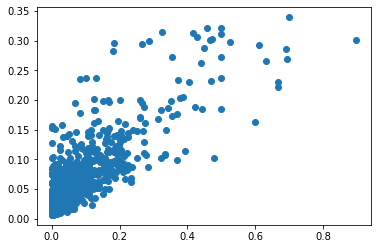

In [369]:
plt.scatter(y_train, y_pred)

C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='click_rate', ylabel='Density'>

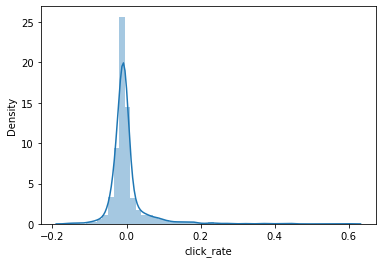

In [371]:
sns.distplot(y_train-y_pred)

#  Using gradient boosting ensemble technique for regression

In [507]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:]

In [508]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

In [509]:
GBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [510]:
def plot_learning_curves(estimator, X_train, y_train, scoring="accuracy", cv=None, n_jobs=1, train_sizes=np.linspace(0.1,1.0,5)):
    """ Generate a plot showing training and test learning curves
        source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

    Parameters
    ----------
    estimator: object type
        the estimator that will be used to implement "fit" and "predict"

    X: array, shape(n_samples, m_features)
        Training vector

    y: array, shape(n_samples)
        Target relative to X

     scoring:string
        The scoring method   

    cv: int
        Cross-validation splitting strategy

    n_jobs: int
        Number of jobs to run in parallel

    train_sizes: array, shape(n_ticks)
        Number of training examples that will be used to generate
        the learning curve
    """

    plt.figure()
    plt.title("Learning Curves\n")
    plt.xlabel("Training examples")
    plt.ylabel("Score ({})".format(scoring))
    plt.legend(loc="best")
    plt.grid()
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")

    plt.plot(train_sizes, train_scores_mean, "o-", color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", 
            label="Cross-validation score")

    plt.show()

No handles with labels found to put in legend.


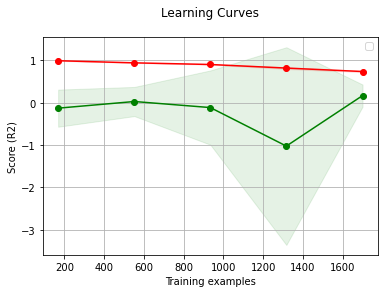

In [511]:
#insight:by looking at the learning cureves we decide weather a model is overfitting or under fitting.. so there is no sigh of
#overfitting or underfitting
plot_learning_curves(GBR, X_train, y_train, scoring="R2", cv=10, n_jobs=4)

In [512]:
model = GBR.fit(X_train,y_train)

In [513]:
y_pred = model.predict(X_train)

In [514]:
accuracy = r2_score(y_pred,y_train)

In [515]:
print("r2_score :", accuracy)

r2_score : 0.441549791219766


# Solving using Linear Regression

In [554]:
from sklearn.linear_model import LinearRegression 

In [555]:
from sklearn.model_selection import cross_val_score

In [556]:
#insight: ive scaled down the features in range of 0-1 using normalize attribute, so that the features are close enough such 
#that the learning rate is well and smooth to come down to the point of global minima 
LR = LinearRegression(normalize = True) 


In [557]:
X_train = train.iloc[:,:]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:]

In [558]:
model = LR.fit(X_train,y_train)
mse = cross_val_score(LR,X_train,y_train,scoring = 'neg_mean_squared_error', cv = 5)

In [559]:
mean_mse = np.mean(mse)
print(mean_mse)

-3.996193904710678e-32


In [560]:
y_pred = model.predict(X_train)

In [561]:
from sklearn.metrics import r2_score

In [562]:
accuracy = r2_score(y_pred,y_train)

# r2_score by using linear regression is 100

In [563]:
print('r2_score :', accuracy)

r2_score : 1.0


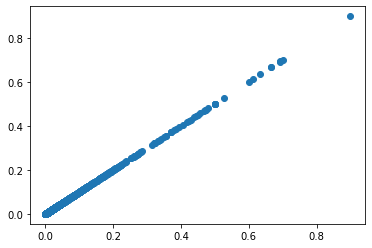

In [564]:
plt.scatter(y_train,y_pred)

C:\Users\ali umar hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='click_rate', ylabel='Density'>

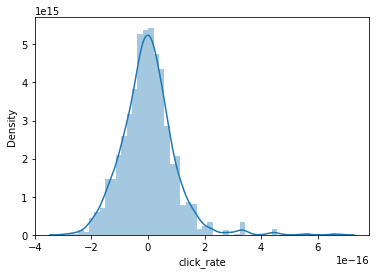

In [565]:
sns.distplot(y_train-y_pred)

In [566]:
y_test = model.predict(X_test)

In [567]:
test['click_rate'] = y_test

# So linear regression model with scaled data gives an accuracy of 100


Hence we can say that the model prepared is the best model and can be used this for deployment.. as it has zero training and testing error

# Step 4: Final Submission

In [544]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,31,0,0,1,0,0,0,0,14,0.142826


In [545]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1889,3,61,12871,11,6,1,2,6,26,...,37,1,0,0,1,0,0,0,14,0.067529
1,1890,3,54,2569,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.271834
2,1891,3,88,1473,78,4,0,0,2,11,...,22,1,0,1,0,0,0,0,10,0.279106
3,1892,3,88,1473,78,3,0,0,2,11,...,22,1,0,1,0,0,0,0,10,0.279106
4,1893,3,78,9020,29,3,0,2,6,26,...,40,0,0,0,0,0,0,0,14,0.071244


In [568]:
final = test

In [569]:
final.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1889,3,61,12871,11,6,1,2,6,26,...,37,1,0,0,1,0,0,0,14,0.067529
1,1890,3,54,2569,256,5,1,1,2,11,...,22,0,0,0,0,0,0,0,10,0.271834
2,1891,3,88,1473,78,4,0,0,2,11,...,22,1,0,1,0,0,0,0,10,0.279106
3,1892,3,88,1473,78,3,0,0,2,11,...,22,1,0,1,0,0,0,0,10,0.279106
4,1893,3,78,9020,29,3,0,2,6,26,...,40,0,0,0,0,0,0,0,14,0.071244


In [570]:
final.shape

(762, 21)

In [574]:
submission = final[['campaign_id','click_rate']]

In [575]:
submission

,campaign_id,click_rate
0,1889,0.067529
1,1890,0.271834
2,1891,0.279106
3,1892,0.279106
4,1893,0.071244
...,...,...
757,2646,0.036662
758,2647,0.039305
759,2648,0.026865
760,2649,0.276729


In [578]:
Final_Submission = submission.to_csv('Final_Submission_JBT.csv', index = False)